In [2]:
import numpy as np
a = np.array([1,2,3])
x = np.array([[[15,16,17],[18,19,20],[21,22,23]]])

In [6]:
np.einsum('a,a',a,a)

14

In [5]:
np.einsum('a,b->',a,a)

36

In [7]:
np.einsum('a,a->a',a,a) # 같은 위치를 곱함, 1차원 결과

array([1, 4, 9])

In [8]:
np.einsum('a,b->ab',a,a) # 외적, 2차원 결과

array([[1, 2, 3],
       [2, 4, 6],
       [3, 6, 9]])

In [16]:
b = np.arange(4).reshape(2,2)
np.einsum('ab -> ba',b) # 전치행렬

array([[0, 2],
       [1, 3]])

In [14]:
np.einsum('aa -> a',b)

array([0, 3])

In [18]:
c = np.arange(2,6).reshape(2,2)
np.einsum('ab,bc -> a',b,c)

array([ 9, 37])

#### batch multiplication

- n개 a * b   ->   nab,nbc-> nac

einsum도 broadcasting이 가능

In [19]:
...

Ellipsis

In [25]:
x = np.arange(18).reshape(2,3,3)
x

array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8]],

       [[ 9, 10, 11],
        [12, 13, 14],
        [15, 16, 17]]])

In [26]:
np.einsum('...ii ->...i',x) # 각 0차원에서의 대각원소

array([[ 0,  4,  8],
       [ 9, 13, 17]])

In [34]:
x = np.arange(6).reshape(3,2)
y = np.arange(12).reshape(4,3)
np.einsum('ki,...k -> i...',x,y)

array([[10, 28, 46, 64],
       [13, 40, 67, 94]])

In [37]:
np.einsum('...k,ki',y,x)

array([[10, 13],
       [28, 40],
       [46, 67],
       [64, 94]])

In [38]:
np.einsum('k...',y)  # transpose

array([[ 0,  3,  6,  9],
       [ 1,  4,  7, 10],
       [ 2,  5,  8, 11]])

In [39]:
np.einsum('k...,ik',y,x) # shape이 안맞음 

ValueError: more operands provided to einstein sum function than specified in the subscripts string

In [42]:
np.einsum('ki,...k->i...',x,y)

array([[10, 28, 46, 64],
       [13, 40, 67, 94]])

In [43]:
np.einsum('ki,...k',x,y)

array([[10, 13],
       [28, 40],
       [46, 67],
       [64, 94]])

In [45]:
np.einsum('...k,...ik',y,x) # 차원 안맞음

ValueError: operands could not be broadcast together with remapped shapes [original->remapped]: (4,3)->(4,newaxis,3) (3,2)->(3,2) 

In [48]:
np.einsum('ki,...k->i...',x,y)
# [0 2 4] [0 1 2] 곱해서 10 

array([[10, 28, 46, 64],
       [13, 40, 67, 94]])

In [49]:
np.einsum('k...,jk...',x,y)

array([[10, 28, 46, 64],
       [13, 40, 67, 94]])

## opencv

- PIL : numpy형태x, 호환o, torch, tensor가 PIL기반으로 처리
- scikit : numpy기반
- opencv
    - image기반 ML/DL 지원
    - 비디오 처리, UI 처리 제공
    - GPU 지원
    
- opencv : 한글 지원x
- c기반임

</br>

#### ML의 목적 : parameter를 조정해 실제와 예측의 loss를 최소화하는 것을 찾음

In [50]:
from sklearn.datasets import load_digits
data = load_digits()
dir(data)
# shape, dtype보기
data.images.shape

(1797, 8, 8)

In [51]:
data.images.dtype

dtype('float64')

In [52]:
data.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

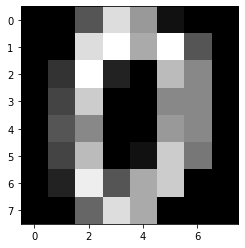

In [54]:
import matplotlib.pyplot as plt
plt.imshow(data.images[0],cmap='gray')

In [56]:
import seaborn as sns
iris = sns.load_dataset('iris')

In [57]:
data.images.reshape(-1,8*8).shape

(1797, 64)

In [60]:
data.images.flatten().shape

(115008,)

In [59]:
len(data.images.ravel())

115008

In [62]:
for i in data.images:
    print(i.flatten())
    break 
    
# 이거말고 einsum..?

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [84]:
np.einsum('ijk->i',data.images ).shape

(1797,)

In [64]:
n_img = data.images.reshape(-1,8*8)

**image 처리에서는 minmaxscaler 빼고는 다 의미를 잃어버림**

In [65]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(n_img,data.target)

KNeighborsClassifier()

In [66]:
knn.predict(data.images[3].reshape(1,-1))

array([3])

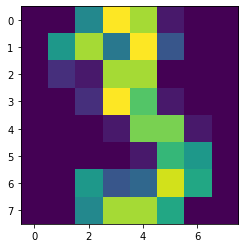

In [67]:
plt.imshow(data.images[3])

#### 위 방법의 문제점

- 일렬로 변화시켜 한것이라 2차원 정보를 모두 손실(image에서 일부 특징만 남긴거라 어느 정도는 분류가능하긴 함.)


In [68]:
import cv2
dir(cv2)

['',
 'ACCESS_FAST',
 'ACCESS_MASK',
 'ACCESS_READ',
 'ACCESS_RW',
 'ACCESS_WRITE',
 'ADAPTIVE_THRESH_GAUSSIAN_C',
 'ADAPTIVE_THRESH_MEAN_C',
 'AGAST_FEATURE_DETECTOR_AGAST_5_8',
 'AGAST_FEATURE_DETECTOR_AGAST_7_12D',
 'AGAST_FEATURE_DETECTOR_AGAST_7_12S',
 'AGAST_FEATURE_DETECTOR_NONMAX_SUPPRESSION',
 'AGAST_FEATURE_DETECTOR_OAST_9_16',
 'AGAST_FEATURE_DETECTOR_THRESHOLD',
 'AKAZE',
 'AKAZE_DESCRIPTOR_KAZE',
 'AKAZE_DESCRIPTOR_KAZE_UPRIGHT',
 'AKAZE_DESCRIPTOR_MLDB',
 'AKAZE_DESCRIPTOR_MLDB_UPRIGHT',
 'AKAZE_create',
 'AgastFeatureDetector',
 'AgastFeatureDetector_AGAST_5_8',
 'AgastFeatureDetector_AGAST_7_12d',
 'AgastFeatureDetector_AGAST_7_12s',
 'AgastFeatureDetector_NONMAX_SUPPRESSION',
 'AgastFeatureDetector_OAST_9_16',
 'AgastFeatureDetector_THRESHOLD',
 'AgastFeatureDetector_create',
 'Algorithm',
 'AlignExposures',
 'AlignMTB',
 'AsyncArray',
 'BFMatcher',
 'BFMatcher_create',
 'BORDER_CONSTANT',
 'BORDER_DEFAULT',
 'BORDER_ISOLATED',
 'BORDER_REFLECT',
 'BORDER_REFLECT101',


In [69]:
cv2.ACCESS_FAST  # 모두 대문자 : 상수로 간주하는 것들

67108864

In [71]:
#cv2.ml -> Machine learning 지원
knn = cv2.ml.KNearest_create()  # 인스턴스화
# dir(knn) -> train

In [73]:
cv2.ml.ROW_SAMPLE

0

In [81]:
cv2.ml.COL_SAMPLE  # 행, 열방향으로 넣을 건지 결정가능

1

In [79]:
n_img = n_img.astype('float32')

In [80]:
knn.train(n_img,0,data.target) # 학습

True

In [82]:
new_img = data.images[3].reshape(1,-1).astype('float32')
knn.findNearest(new_img,3)  # 가까운 이미지 3개 찾기

# 3으로 예측, 3개의 거리 출력

(3.0,
 array([[3.]], dtype=float32),
 array([[3., 3., 3.]], dtype=float32),
 array([[  0., 197., 232.]], dtype=float32))